# Activity 2.2 - Transfer Learning 

#### Objective(s):

This activity aims to introduce how to apply transfer learning 

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural network 
* Demonstrate how to apply transfer learning in neural network


#### Resources:
* Jupyter Notebook
* CIFAR-10 dataset

#### Procedures
Load the necessary libraries

In [1]:
from __future__ import print_function

import datetime
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt

Set the parameters

In [2]:
now = datetime.datetime.now
batch_size = 128
num_classes = 5
epochs = 100
img_rows, img_cols = 28, 28
filters = 32
pool_size = 2
kernel_size = 3

Set how the input data is loaded

In [3]:
if K.image_data_format() == 'channels_first':
    input_shape = (1, img_rows, img_cols)
else:
    input_shape = (img_rows, img_cols, 1)

* Write a function to include all the training steps. 
* Use the model, training set, test set and number of classes as function parameters


In [4]:
def train_model(model, train, test, num_classes):
    x_train = train[0].reshape((train[0].shape[0],) + input_shape)
    x_test = test[0].reshape((test[0].shape[0],) + input_shape)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    print('x_train shape:', x_train.shape)
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(train[1], num_classes)
    y_test = keras.utils.to_categorical(test[1], num_classes)

    model.compile(loss='categorical_crossentropy',
                  optimizer='adadelta',
                  metrics=['accuracy'])

    t = now()
    hist = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))
    print('Training time: %s' % (now() - t))

    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])
    
    return hist

Shuffle and split the data between train and test sets

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()



Create two datasets 
* one with digits below 5
* one with 5 and above

In [6]:
x_train_lt5 = x_train[y_train < 5]
y_train_lt5 = y_train[y_train < 5]
x_test_lt5 = x_test[y_test < 5]
y_test_lt5 = y_test[y_test < 5]

x_train_gte5 = x_train[y_train >= 5]
y_train_gte5 = y_train[y_train >= 5] - 5
x_test_gte5 = x_test[y_test >= 5]
y_test_gte5 = y_test[y_test >= 5] - 5

* Define the feature layers that will used for transfer learning
* Freeze these layers during fine-tuning process

In [7]:


feature_layers = [
    Conv2D(filters, kernel_size,
           padding='valid',
           input_shape=input_shape),
    Activation('relu'),
    Conv2D(filters, kernel_size),
    Activation('relu'),
    MaxPooling2D(pool_size=pool_size),
    Dropout(0.25),
    Flatten(),
]

Define the classification layers

In [8]:
classification_layers = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(num_classes),
    Activation('softmax')
]

Create a model by combining the feature layers and classification layers

In [9]:

model = Sequential(feature_layers + classification_layers)

Check the model summary

In [10]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                        

 Train the  model on the digits 5,6,7,8,9

In [11]:
hist1 = train_model(model,
            (x_train_gte5, y_train_gte5),
            (x_test_gte5, y_test_gte5), num_classes)

x_train shape: (29404, 28, 28, 1)
29404 train samples
4861 test samples
Epoch 1/100
230/230 [==============================] - 5s 10ms/step - loss: 1.6182 - accuracy: 0.1822 - val_loss: 1.6018 - val_accuracy: 0.2055
Epoch 2/100
230/230 [==============================] - 2s 8ms/step - loss: 1.5927 - accuracy: 0.2382 - val_loss: 1.5735 - val_accuracy: 0.3331
Epoch 3/100
230/230 [==============================] - 2s 8ms/step - loss: 1.5664 - accuracy: 0.3059 - val_loss: 1.5436 - val_accuracy: 0.4285
Epoch 4/100
230/230 [==============================] - 2s 8ms/step - loss: 1.5369 - accuracy: 0.3788 - val_loss: 1.5106 - val_accuracy: 0.5345
Epoch 5/100
230/230 [==============================] - 2s 8ms/step - loss: 1.5041 - accuracy: 0.4508 - val_loss: 1.4728 - val_accuracy: 0.6098
Epoch 6/100
230/230 [==============================] - 2s 8ms/step - loss: 1.4682 - accuracy: 0.5090 - val_loss: 1.4294 - val_accuracy: 0.6667
Epoch 7/100
230/230 [==============================] - 2s 8ms/step - 

In [12]:
def plot_training_history(history):
    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='center right')
    plt.show()

    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='center right')
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.show()

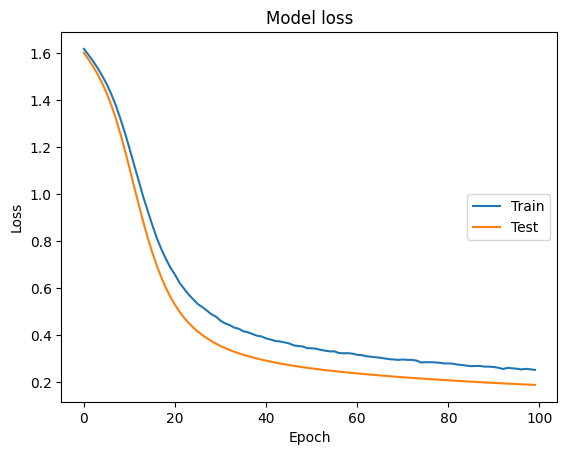

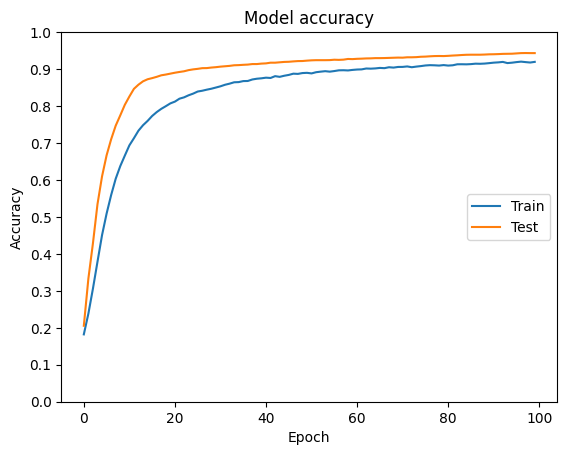

In [13]:
# Plot the model performance before freezing
plot_training_history(hist1)

Freeze only the feature layers

In [14]:
for l in feature_layers:
    l.trainable = False

Check again the summary and observe the parameters from the previous model

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                        

Train again the model using the 0 to 4 digits

In [16]:
hist2 = train_model(model,
            (x_train_lt5, y_train_lt5),
            (x_test_lt5, y_test_lt5), num_classes)

x_train shape: (30596, 28, 28, 1)
30596 train samples
5139 test samples
Epoch 1/100
240/240 [==============================] - 2s 5ms/step - loss: 2.2733 - accuracy: 0.3939 - val_loss: 1.9454 - val_accuracy: 0.4059
Epoch 2/100
240/240 [==============================] - 1s 4ms/step - loss: 1.8364 - accuracy: 0.4298 - val_loss: 1.5565 - val_accuracy: 0.4581
Epoch 3/100
240/240 [==============================] - 1s 5ms/step - loss: 1.5436 - accuracy: 0.4701 - val_loss: 1.2960 - val_accuracy: 0.5252
Epoch 4/100
240/240 [==============================] - 1s 5ms/step - loss: 1.3295 - accuracy: 0.5192 - val_loss: 1.1099 - val_accuracy: 0.5867
Epoch 5/100
240/240 [==============================] - 1s 4ms/step - loss: 1.1716 - accuracy: 0.5628 - val_loss: 0.9737 - val_accuracy: 0.6416
Epoch 6/100
240/240 [==============================] - 1s 5ms/step - loss: 1.0490 - accuracy: 0.6119 - val_loss: 0.8708 - val_accuracy: 0.6822
Epoch 7/100
240/240 [==============================] - 1s 5ms/step - l

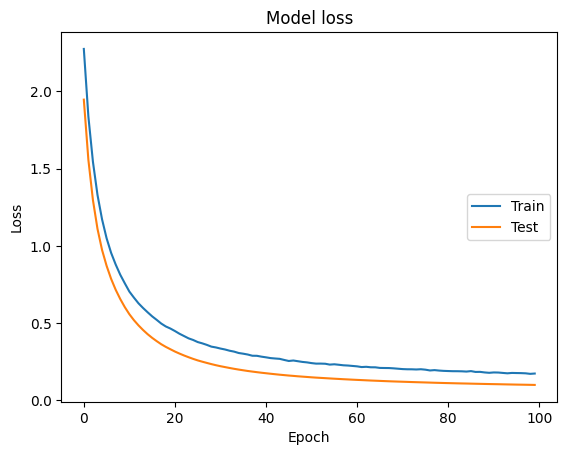

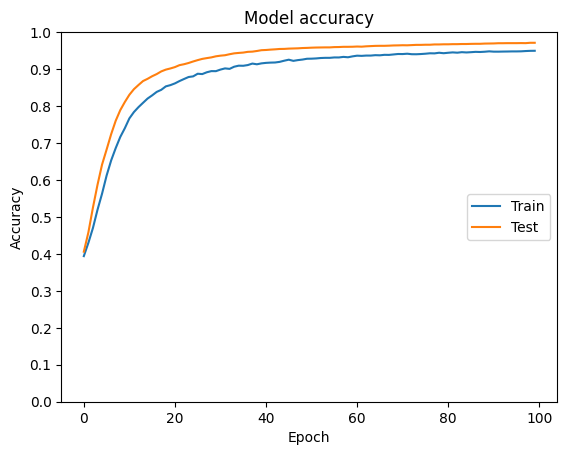

In [17]:
# Model after freezing
plot_training_history(hist2)

#### Supplementary Activity
Now write code to reverse this training process. That is, you will train on the digits 0-4, and then finetune only the last layers on the digits 5-9.

In [18]:
feature_layers_suple = [
    Conv2D(filters, kernel_size,
           padding='valid',
           input_shape=input_shape),
    Activation('relu'),
    Conv2D(filters, kernel_size),
    Activation('relu'),
    MaxPooling2D(pool_size=pool_size),
    Dropout(0.25),
    Flatten(),
]

In [19]:
classification_layers_suple = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(num_classes),
    Activation('softmax')
]

In [20]:
model2 = Sequential(feature_layers_suple + classification_layers_suple) 

hist_suple = train_model(model2,
            (x_train_lt5, y_train_lt5),
            (x_test_lt5, y_test_lt5), num_classes)

x_train shape: (30596, 28, 28, 1)
30596 train samples
5139 test samples
Epoch 1/100
240/240 [==============================] - 2s 8ms/step - loss: 1.5990 - accuracy: 0.2295 - val_loss: 1.5707 - val_accuracy: 0.3818
Epoch 2/100
240/240 [==============================] - 2s 8ms/step - loss: 1.5634 - accuracy: 0.3037 - val_loss: 1.5307 - val_accuracy: 0.5310
Epoch 3/100
240/240 [==============================] - 2s 8ms/step - loss: 1.5260 - accuracy: 0.3759 - val_loss: 1.4871 - val_accuracy: 0.5906
Epoch 4/100
240/240 [==============================] - 2s 8ms/step - loss: 1.4835 - accuracy: 0.4429 - val_loss: 1.4387 - val_accuracy: 0.6385
Epoch 5/100
240/240 [==============================] - 2s 8ms/step - loss: 1.4347 - accuracy: 0.5142 - val_loss: 1.3840 - val_accuracy: 0.7387
Epoch 6/100
240/240 [==============================] - 2s 8ms/step - loss: 1.3835 - accuracy: 0.5731 - val_loss: 1.3216 - val_accuracy: 0.8219
Epoch 7/100
240/240 [==============================] - 2s 8ms/step - l

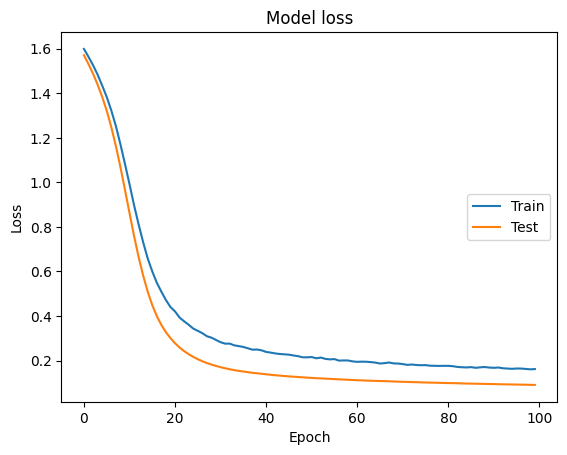

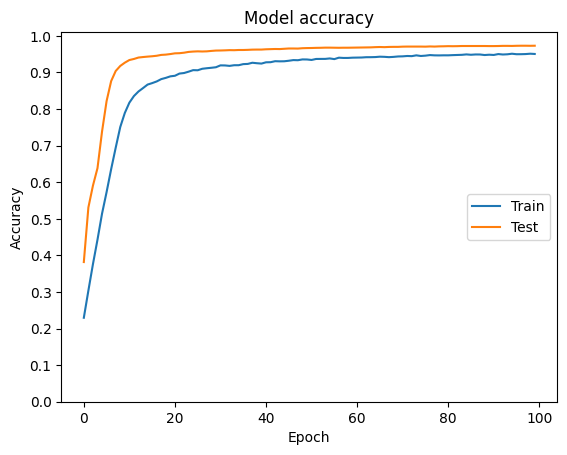

In [21]:
# Before freezing
plot_training_history(hist_suple)

In [22]:
# Freeze the layers 
for i in feature_layers_suple:
    i.trainable = False

In [23]:
# Train for greater than or equal to 5

hist_suple_frozen = train_model(model2,
            (x_train_gte5, y_train_gte5),
            (x_test_gte5, y_test_gte5), num_classes)

x_train shape: (29404, 28, 28, 1)
29404 train samples
4861 test samples
Epoch 1/100
230/230 [==============================] - 1s 5ms/step - loss: 2.9310 - accuracy: 0.3337 - val_loss: 2.5624 - val_accuracy: 0.3686
Epoch 2/100
230/230 [==============================] - 1s 4ms/step - loss: 2.4235 - accuracy: 0.3454 - val_loss: 2.0745 - val_accuracy: 0.3833
Epoch 3/100
230/230 [==============================] - 1s 4ms/step - loss: 2.0390 - accuracy: 0.3655 - val_loss: 1.7065 - val_accuracy: 0.4104
Epoch 4/100
230/230 [==============================] - 1s 4ms/step - loss: 1.7383 - accuracy: 0.3970 - val_loss: 1.4497 - val_accuracy: 0.4524
Epoch 5/100
230/230 [==============================] - 1s 4ms/step - loss: 1.5385 - accuracy: 0.4352 - val_loss: 1.2759 - val_accuracy: 0.5188
Epoch 6/100
230/230 [==============================] - 1s 4ms/step - loss: 1.3892 - accuracy: 0.4786 - val_loss: 1.1548 - val_accuracy: 0.5828
Epoch 7/100
230/230 [==============================] - 1s 4ms/step - l

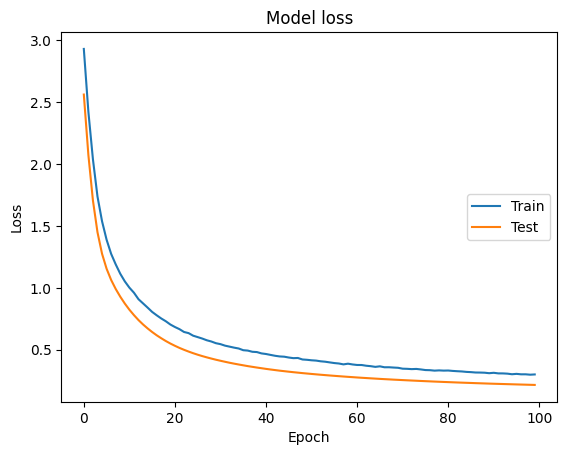

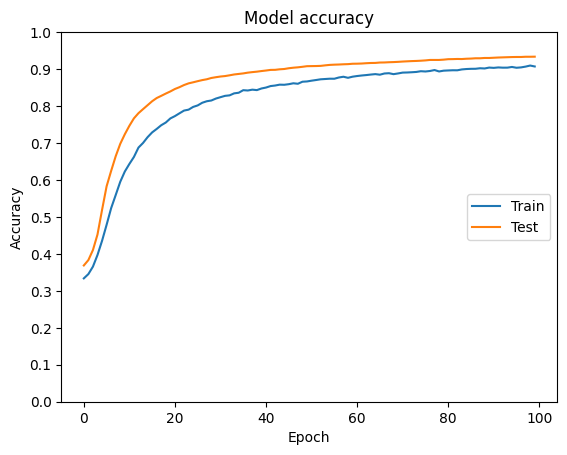

In [24]:
plot_training_history(hist_suple_frozen)

#### Conclusion

This activity gave me knowledge regarding transfer learning and what does it mean. Transfer learning means, using a model that was trained earlier to do a second task, which in this activity is first classifying numbers from 0-4 and 5-9. What we did here is that we set the feature layers' trainable to false. Before using it to fit the second dataset which is 5-9. In this case. The model didn't have to relearn or re-extract the features it needs to classify.